<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/037__Working_with_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 5/6: DATA CLEANING IN PYTHON: ADVANCED

# MISSION 4: Working with Missing Data

Identify and deal with missing and incorrect data.


## 1. Introduction

In the last mission of this course, we're going to learn more about working with missing data. As we learned in [Working with Missing and Duplicate Data](https://app.dataquest.io/m/347/working-with-missing-and-duplicate-data), data can be missing for a variety of reasons.

In this mission, we'll learn how to handle missing data without having to drop rows and columns using data on motor vehicle collisions released by [New York City](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95) and published on the NYC OpenData website. There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added.

We'll work with an extract of the full data: Crashes from the year 2018. We made several modifications to the data for teaching purposes, including randomly sampling the data to reduce its size. You can download the data set from this mission by using the data set preview tool at the top of the "script.py" codebox on the right.

Our data set is in a CSV called `nypd_mvc_2018.csv`. We can read our data into a pandas dataframe and inspect the first few rows of the data:

In [1]:

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Once you have completed verification, go to the CSV file in Google Drive, right-click on it and select “Get shareable link”, and cut out the unique id in the link.
# https://drive.google.com/file/d/137_5T2t59aksuPV2aLP5VldshtCb9vN1/view?usp=sharing
id = "137_5T2t59aksuPV2aLP5VldshtCb9vN1"

In [3]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('nypd_mvc_2018.csv')

In [4]:
# Once you have completed verification, go to the CSV file in Google Drive, right-click on it and select “Get shareable link”, and cut out the unique id in the link.
# https://drive.google.com/file/d/111gD0MnU_ekqTMK-KYgNt7uP5WEVZJCl/view?usp=sharing
id = "111gD0MnU_ekqTMK-KYgNt7uP5WEVZJCl"

In [5]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('supplemental_data.csv')

In [6]:
import pandas as pd
import numpy as np
mvc = pd.read_csv("nypd_mvc_2018.csv")

print(mvc)

       unique_key        date  ... cause_vehicle_4 cause_vehicle_5
0         3869058  2018-03-23  ...             NaN             NaN
1         3847947  2018-02-13  ...             NaN             NaN
2         3914294  2018-06-04  ...             NaN             NaN
3         3915069  2018-06-05  ...             NaN             NaN
4         3923123  2018-06-16  ...             NaN             NaN
...           ...         ...  ...             ...             ...
57859     3835191  2018-01-26  ...             NaN             NaN
57860     3890674  2018-04-29  ...             NaN             NaN
57861     3946458  2018-07-21  ...             NaN             NaN
57862     3914574  2018-06-04  ...             NaN             NaN
57863     4034882  2018-11-29  ...             NaN             NaN

[57864 rows x 26 columns]


A summary of the columns and their data is below:

- `unique_key`: A unique identifier for each collision.
- `date`, `time`: Date and time of the collision.
- `borough`: The [borough](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City), or area of New York City, where the collision occurred.
- `location`: Latitude and longitude coordinates for the collision.
- `on_street`, `cross_street`, `off_street`: Details of the street or intersection where the collision occurred.
- `pedestrians_injured`: Number of pedestrians who were injured.
- `cyclist_injured`: Number of people traveling on a bicycle who were injured.
- `motorist_injured`: Number of people traveling in a vehicle who were injured.
- `total_injured`: Total number of people injured.
- `pedestrians_killed`: Number of pedestrians who were killed.
- `cyclist_killed`: Number of people traveling on a bicycle who were killed.
- `motorist_killed`: Number of people traveling in a vehicle who were killed.
- `total_killed`: Total number of people killed.
- `vehicle_1` through `vehicle_5`: Type of each vehicle involved in the accident.
- `cause_vehicle_1` through `cause_vehicle_5`: Contributing factor for each vehicle in the accident.

Let's quickly recap how to count missing values. We'll start by creating a dataframe with random null values:

In [7]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[.3, .7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

     A    B    C
0  1.0  1.0  NaN
1  NaN  NaN  NaN
2  1.0  NaN  1.0


Next, we can use the `DataFrame.isnull()` [method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) to identify which values are null:

In [8]:
print(df.isnull())

       A      B      C
0  False  False   True
1   True   True   True
2  False   True  False


We can chain the result to `DataFrame.sum()` [method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) to count the number of null values in each column:

In [9]:
print(df.isnull().sum())

A    1
B    2
C    2
dtype: int64


Let's use this technique to count the null values in our data set.

**Instructions:**

We have read the CSV file into a pandas dataframe called `mvc`.

1. Create a series that counts the number of null values in each of the columns in the `mvc` dataframe. Assign the result to `null_counts`.

In [10]:
#### Below the solution to make the next chapter work
data = np.random.choice([1.0, np.nan],
 size=(3, 3), p=[.3, .7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

null_counts = mvc.isnull().sum()

     A    B    C
0  NaN  NaN  NaN
1  1.0  NaN  NaN
2  NaN  1.0  1.0


## 2. Verifying the Total Columns

To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column. Below, we divide the number of null values in each column by the total number of values in the data set:



In [11]:
null_counts_pct = null_counts / mvc.shape[0] * 100

We'll then add both the counts and percentages to a dataframe to make them easier to compare:

In [12]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)

print(null_df)

             unique_key  date  ...  cause_vehicle_4  cause_vehicle_5
null_counts           0     0  ...            57111            57671
null_pct              0     0  ...               98               99

[2 rows x 26 columns]


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%!

To make things easier, let's start by looking at the group of columns that relate to people killed in collisions.

We'll use list comprehension to reduce our summary dataframe to just those columns:



In [13]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
print(null_df[killed_cols])

             pedestrians_killed  cyclist_killed  motorist_killed  total_killed
null_counts                   0               0                0             5
null_pct                      0               0                0             0


We can see that each of the individual categories have no missing values, but the `total_killed` column has five missing values.

One option for handling this would be to remove – or drop – those five rows. This would be a reasonably valid choice since it's a tiny portion of the data, but let's think about what other options we have first.

If you think about it, the total number of people killed should be the sum of each of the individual categories. We might be able to "fill in" the missing values with the sums of the individual columns for that row. The technical name for filling in a missing value with a replacement value is called **imputation**.



Let's look at how we could explore the values where the `total_killed` isn't equal to the sum of the other three columns. We'll illustrate this process using a series of diagrams. The diagrams won't contain values, they'll just show a grid to represent the values.

Let's start with a dataframe of just the four columns relating to people killed:
![img](https://s3.amazonaws.com/dq-content/370/verify_totals_1.svg)



We then select just the first three columns, and manually sum each row:

![img](https://s3.amazonaws.com/dq-content/370/verify_totals_2.svg)

We then compare the manual sum to the original total column to create a boolean mask where equivalent values are *not* equal:

![img](https://s3.amazonaws.com/dq-content/370/verify_totals_3.svg)

Lastly, we use the boolean mask to filter the original dataframe to include only rows where the manual sum and original aren't equal:

![img](https://s3.amazonaws.com/dq-content/370/verify_totals_4.svg)

Let's use this strategy to look at the rows that don't match up!



**Instructions:**

We created a dataframe `killed`, containing the five columns that relate to people killed in collisions.

1. Select the first three columns from `killed` and sum each row. Assign the result to `killed_manual_sum`.
2. Create a boolean mask that checks whether each value in `killed_manual_sum` is not equal to the values in the `total_killed` column. Assign the boolean mask to `killed_mask`.
3. Use `killed_mask` to filter the rows in `killed`. Assign the result to `killed_non_eq`.


In [14]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

In [15]:
### Part of the solution to make the next chapter work
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]

## 3. Filling and Verifying the Killed and Injured Data

The `killed_non_eq` dataframe we created in the previous exercise contained six rows:

In [16]:
killed_non_eq.head(6)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


We can categorize these into two categories:

1. Five rows where the `total_killed` is not equal to the sum of the other columns because the total value is missing.
2. One row where the `total_killed` is less than the sum of the other columns.

From this, we can conclude that filling null values with the sum of the columns is a fairly good choice for our imputation, given that only six rows out of around 58,000 don't match this pattern.

We've also identified a row that has suspicious data - one that doesn't sum correctly. Once we have imputed values for all rows with missing values for `total_killed`, we'll mark this suspect row by setting its value to `NaN`.

In order to execute this, we'll learn to use the `Series.mask()` [method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mask.html). `Series.mask()` is useful when you want to replace certain values in a series based off a boolean mask. The syntax for the method is:

```
Series.mask(bool_mask, val_to_replace)
```

Let's look at an example with some simple data. We'll start with a series called `fruits`:
![img](https://s3.amazonaws.com/dq-content/370/mask_1.svg)

Next, we create a boolean series that matches values equal to the string `Banana`:

![img](https://s3.amazonaws.com/dq-content/370/mask_2.svg)


Lastly, we use `Series.mask()` to replace all the values that match the boolean series with a new value, `Pear`:
![img](https://s3.amazonaws.com/dq-content/370/mask_3.svg)



If we wanted to describe the logic of the code above, we'd say *For each value in the "fruits" series, if the corresponding value in the "bool" series is true, update the value to "Pear," otherwise leave the original value.*



In the first example above, we updated a single value, but we can also update with the matching value from a series that has identical index labels, like this `nums` series:

![img](https://s3.amazonaws.com/dq-content/370/mask_4.svg)

Let's look at how we can update the matching values in `fruit` with the corresponding values in `nums`:
![img](https://s3.amazonaws.com/dq-content/370/mask_5.svg)



If we wanted to describe the logic of the code above, we'd say *For each value in the "fruits" series, if the corresponding value in the "bool" series is true, update the value to the corresponding value from "nums," otherwise leave the original value.*

Let's look at how we'd use this technique to update the values in the `total_killed` column. First, we'll replace all null values with the equivalent values from our `killed_manual_sum` series:


In [17]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

Next, we'll replace any values where the manual sum and the total column aren't equal with `np.nan`. This time we'll define the boolean series directly into `Series.mask()`:

In [18]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

Now let's look at the values we've changed:

In [19]:
print(killed[killed_mask])

       pedestrians_killed  cyclist_killed  motorist_killed  total_killed
3508                    0               0                0           0.0
20163                   0               0                0           0.0
22046                   0               0                1           NaN
48719                   0               0                0           0.0
55148                   0               0                0           0.0
55699                   0               0                0           0.0


We've gone from five null values to one, and flagged some suspicious data. Let's do the same for the injured columns.

**Instructions:**

We included the code to clean the `killed` columns. In addition, we've created an `injured` dataframe with just the `injured` columns and `injured_manual_sum`, a series manually summing the three individual injured columns.

1. Use `Series.mask()` to replace any null values from the `total_injured` column with their equivalents from the `injured_manual_sum` series.
2. Use `Series.mask()` to replace any numbers from `total_injured` that aren't equal to their equivalents in `injured_manual_sum` with `np.nan`.

In [20]:
# Solution to continue next chapter
# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

## 4. Assigning the Corrected Data Back to the Main Dataframe

Let's summarize the count of null values before and after our changes:

In [21]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       0


For the `total_killed` column, the number of values has gone down from 5 to 1. For the `total_injured` column, the number of values has actually gone up — from 1 to 21. This might sound like we've done the opposite of what we set out to do, but what we've actually done is fill all the null values **and** identify values that have suspect data. This will make any analysis we do on this data more accurate in the long run.

Let's assign the values from the `killed` and `injured` dataframe back to the main `mvc` dataframe:

**Instructions:**

1. Assign the `total_injured` column from the `injured` dataframe to the same column in the `mvc` dataframe.
2. Assign the `total_killed` column from the `killed` dataframe to the same column in the `mvc` dataframe.

## 5. Visualizing Missing Data with Plots

Earlier, we used a table of numbers to understand the number of missing values in our dataframe. A different approach we can take is to use a plot to visualize the missing values. The function below uses `seaborn.heatmap()` to represent null values as light squares and non-null values as dark squares:



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

Let's look at how the function works by using it to plot just the first row of our `mvc` dataframe. We'll display the first row as a table immediately below so it's easy to compare:

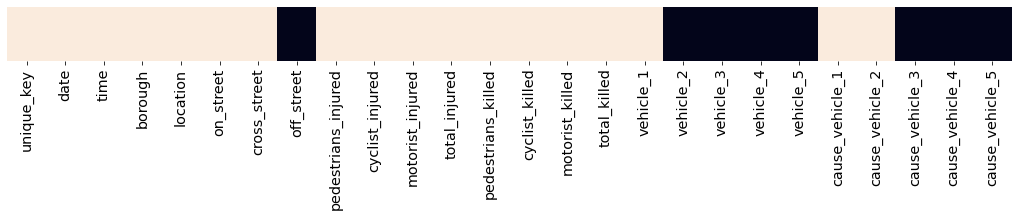

In [24]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [25]:
print(mvc.head(1))

   unique_key        date  ... cause_vehicle_4 cause_vehicle_5
0     3869058  2018-03-23  ...             NaN             NaN

[1 rows x 26 columns]


Each value is represented by a dark square, and each missing value is represented by a light square.

Let's look at what a plot matrix looks like for the whole dataframe:

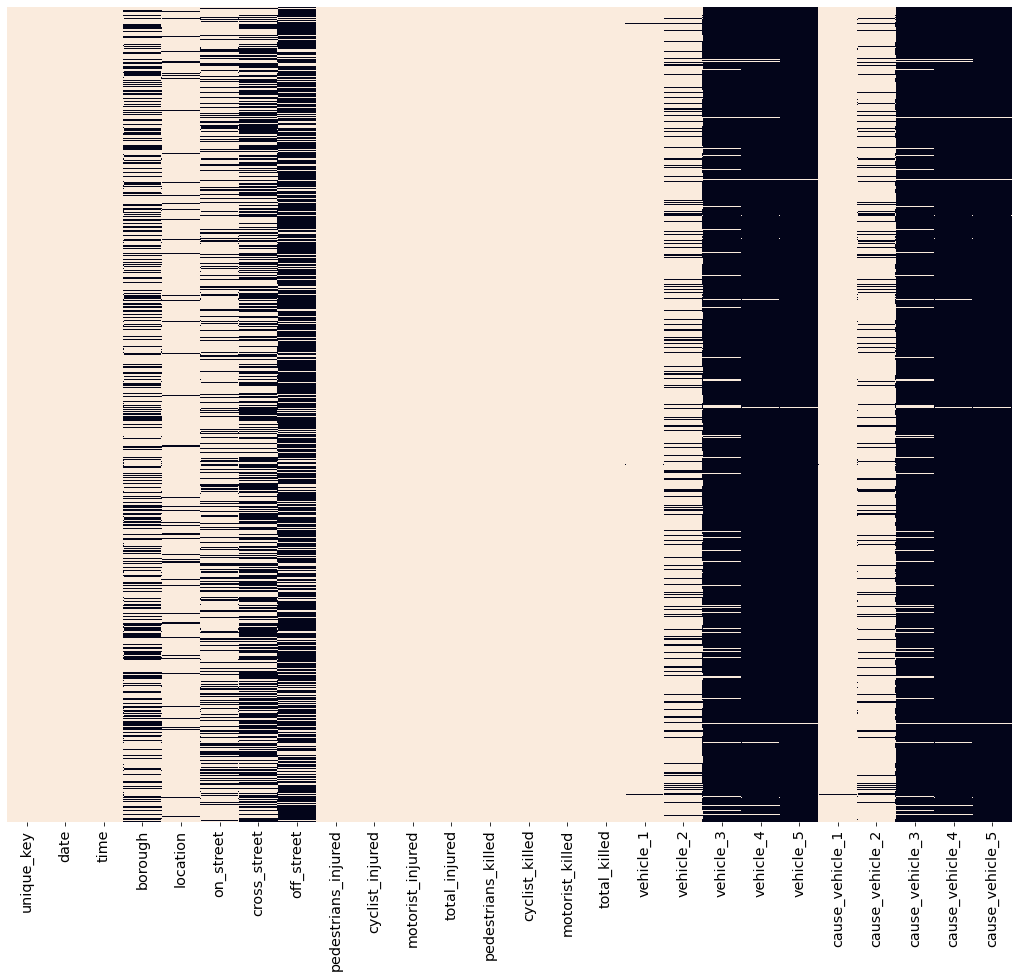

In [26]:
plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

- The first three columns have few to no missing values.
- The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
- The next eight columns are the `injury` and `killed` columns we just cleaned, and only have a few missing values.
- The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely. We can calculate the relationship between two sets of columns, known as **correlation**. To calculate this we use the `dataframe.corr()` [method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) (You'll learn more about correlation in a later course). Here's what that looks like:

In [27]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
print(missing_corr)

                  borough  location  ...  cause_vehicle_4  cause_vehicle_5
borough          1.000000  0.190105  ...        -0.020158        -0.011348
location         0.190105  1.000000  ...         0.004604        -0.004841
on_street       -0.350190 -0.073975  ...         0.002737        -0.003107
cross_street     0.409107 -0.069719  ...        -0.022074        -0.013455
off_street       0.362189  0.084579  ...        -0.002580         0.002863
total_injured   -0.003096 -0.001115  ...         0.000477         0.000240
total_killed    -0.003043 -0.002494  ...         0.001067         0.000538
vehicle_1       -0.018325 -0.010466  ...         0.009022         0.004545
vehicle_2       -0.077516 -0.033842  ...         0.058050         0.029264
vehicle_3       -0.061932 -0.000927  ...         0.448525         0.225067
vehicle_4       -0.020406  0.004655  ...         0.963723         0.515058
vehicle_5       -0.010733 -0.005797  ...         0.490537         0.973664
cause_vehicle_1 -0.012115

Each value is between 
−
1
 and 
1
, and represents the relationship between two columns. A number close to 
−
1
 or 
1
 represents a strong relationship, where a number in the middle (close to 
0
) represents a weak relationship.

If you look closely, you can see a diagonal line of 
1
s going from top left to bottom right. These values represent each columns relationship with itself, which of course is a perfect relationship. The values on the top/right of this "line of 
1
s" mirror the values on the bottom/left of this line: The table actually repeats every value twice!

Correlation tables can be hard to interpret. We can convert our table into a plot which will make this a lot easier. Let's see what this plot looks like:

![img](https://s3.amazonaws.com/dq-content/370/correlations_df.png)

In our correlation plot:

- The "line of 
1
s" and the repeated values are removed so that it's not visually overwhelming.
- Values very close to 
0
, where there is little to no relationship, aren't labeled.
- Values close to 
1
 are dark blue and values close to 
−
1
 are dark red — the depth of color represents the strength of the relationship.

We provided a helper function to create correlation plots. Let's create a correlation plot of just those last 10 columns to see if we can more closely identify the pattern we saw earlier in the matrix plot.



**Instructions:**

We created a function, `plot_null_correlations()`, which will plot correlations between null values in a dataframe.

1. Use list comprehension to produce a list of column names containing the substring `'vehicle'`.
2. Use the list of column names to select only those columns from the `mvc` dataframe. Pass the result to the `plot_null_correlations()` function.

## 6. Analyzing Correlations in Missing Data

## 7. Finding the Most Common Values Across Multiple Columns

## 8. Filling Unknown Values with a Placeholder

## 9. Missing Data in the "Location" Columns

## 10. Imputing Location Data